In [12]:
%pip install pmdarima;

In [13]:
#Check Version
import statsmodels._version
if statsmodels._version.get_versions()['version'] != '0.11.1':
  !pip install --upgrade statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%cd "/content/drive/My Drive/Colab Notebooks/Time_Series_Projects/Data"

df1 = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS' # Month Start

df2 = pd.read_csv('DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D' # Month Start
df2 = df2[:120]

df3 = pd.read_csv('TradeInventories.csv',index_col='Date',parse_dates=True)
df3.index.freq = 'MS'

/content/drive/My Drive/Colab Notebooks/Time_Series_Projects/Data


In [14]:
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults


In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

#**ARMA**

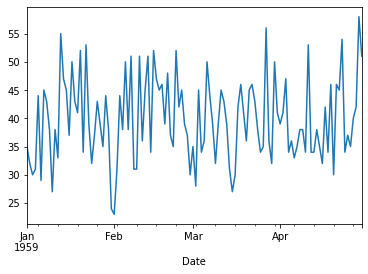

In [16]:
df2['Births'].plot()

### Function for running the augmented Dickey-Fuller test
Since we'll use it frequently in the upcoming forecasts, let's define a function we can copy into future notebooks for running the augmented Dickey-Fuller test. Remember that we'll still have to import <tt>adfuller</tt> at the top of our notebook.

In [17]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    print('\nResult:')
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [18]:
adf_test(df2['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00

Result:
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


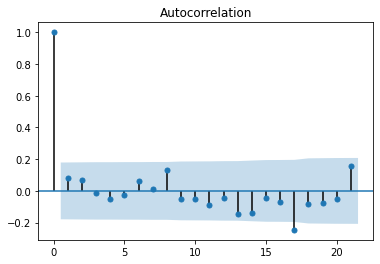

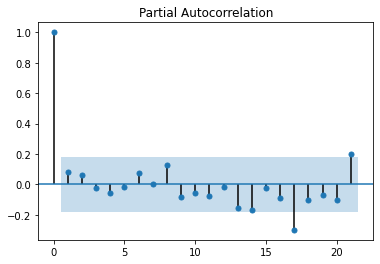

In [19]:
plot_acf(df2['Births'])
plot_pacf(df2['Births']);

In [20]:
from pmdarima import auto_arima

In [21]:
#help(auto_arima)

In [22]:
print(auto_arima(df2['Births'],seasonal=False,start_p=2,start_q=2,trace=True).summary())

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=829.565, BIC=846.290, Time=0.448 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=823.489, BIC=829.064, Time=0.012 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=824.647, BIC=833.010, Time=0.049 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=824.747, BIC=833.110, Time=0.062 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=1230.607, BIC=1233.395, Time=0.008 seconds
Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=826.399, BIC=837.549, Time=0.279 seconds
Total fit time: 0.864 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Sun, 28 Jun 2020   AIC                            823.489
Time:                        23:46:18   BIC                         

In [23]:
#train test split
train = df2.iloc[:90]
test = df2.iloc[90:]

In [24]:
model = ARMA(train['Births'],order = (2,2)).fit()

In [25]:
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Sun, 28 Jun 2020   AIC                            627.809
Time:                        23:46:18   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.608      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.67

In [28]:
start = len(train)
end = len(train) + len(test) - 1

In [29]:
prediction2 = model.predict(start,end).rename('ARMA(2,2) Predictions')

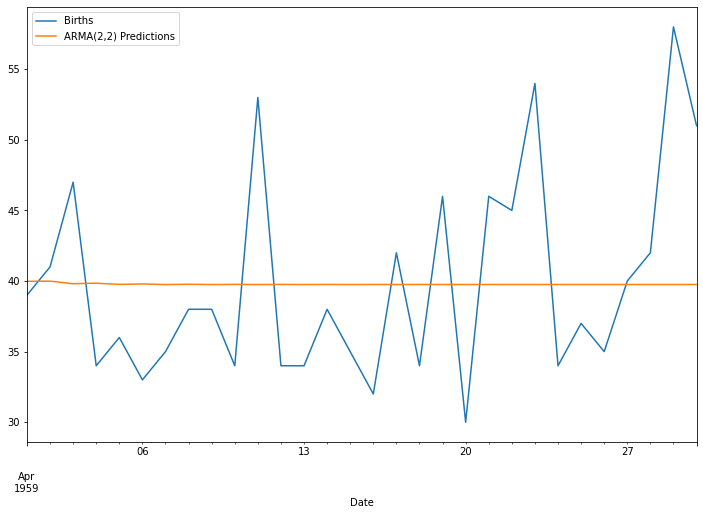

In [34]:
test.plot(legend = True,figsize=(12,8))
prediction2.plot(legend = True)


In [71]:
stepwise_fit = auto_arima(df2['Births'],start_p=0,start_q=0,max_p=6,max_q=3,seasonal=False,trace=True)#trace will show the grid search

Performing stepwise search to minimize aic
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=815.646, BIC=821.221, Time=0.010 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=806.910, BIC=815.273, Time=0.032 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=809.089, BIC=817.451, Time=0.044 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=1257.894, BIC=1260.682, Time=0.006 seconds
Fit ARIMA(2,0,0)x(0,0,0,0) [intercept=True]; AIC=807.307, BIC=818.457, Time=0.052 seconds
Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=806.439, BIC=817.589, Time=0.208 seconds
Fit ARIMA(2,0,1)x(0,0,0,0) [intercept=True]; AIC=808.430, BIC=822.367, Time=0.247 seconds
Fit ARIMA(1,0,2)x(0,0,0,0) [intercept=True]; AIC=808.423, BIC=822.361, Time=0.314 seconds
Fit ARIMA(0,0,2)x(0,0,0,0) [intercept=True]; AIC=809.140, BIC=820.290, Time=0.096 seconds
Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=807.970, BIC=824.695, Time=0.352 seconds
Near non-invertible roots for order (2, 0, 2)(0, 0, 0,

In [72]:
print(stepwise_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -399.220
Date:                Sun, 28 Jun 2020   AIC                            806.439
Time:                        23:35:19   BIC                            817.589
Sample:                             0   HQIC                           810.967
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0743     10.062      1.299      0.194      -6.647      32.796
ar.L1          0.7082      0.225      3.154      0.002       0.268       1.148
ma.L1         -0.4668      0.290     -1.608      0.1

In [73]:
stepwise_fit = auto_arima(df1['Thousands of Passengers'],start_p=0,start_q=1,max_p=4,max_q=4,seasonal=True,trace=True,m=12)

Performing stepwise search to minimize aic
Fit ARIMA(0,1,1)x(1,1,1,12) [intercept=True]; AIC=1022.207, BIC=1036.583, Time=1.062 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=1033.479, BIC=1039.229, Time=0.023 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=1022.316, BIC=1033.817, Time=0.443 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=1022.904, BIC=1034.405, Time=0.522 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=1031.508, BIC=1034.383, Time=0.020 seconds
Fit ARIMA(0,1,1)x(1,1,0,12) [intercept=True]; AIC=1022.314, BIC=1033.815, Time=0.321 seconds
Fit ARIMA(0,1,1)x(2,1,1,12) [intercept=True]; AIC=1015.841, BIC=1033.092, Time=4.036 seconds
Near non-invertible roots for order (0, 1, 1)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(0,1,1)x(1,1,2,12) [intercept=True]; AIC=1014.930, BIC=1032.181, Time=3.553 seconds
Fit ARIMA(0,1,1)x(0,1,2,12) [intercept=True]; AIC=102

In [74]:
print(stepwise_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood                -499.166
Date:                            Sun, 28 Jun 2020   AIC                           1014.331
Time:                                    23:35:56   BIC                           1037.333
Sample:                                         0   HQIC                          1023.678
                                            - 144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0011      0.030      0.037      0.971      -0.057       0.059
ar.L1         -0.9165      0.078   